### K-Means iteration visulizer

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
def k_means(X, N_clusters=3, N_iterations=20):
    _size = len(X)
    rand_cent = [0 for _ in range(N_clusters)]
    for j in range(N_clusters) : rand_cent[j] = [np.random.random()+3, np.random.random()-3]
    label = [0 for _ in range(_size)]
    stop = False
    it = 0
    while stop == False and it <= N_iterations:
        old_cent = rand_cent
        it += 1
        for i in range(_size):
            dist = [np.linalg.norm(np.array(X[i]) - np.array(rand_cent[j])) for j in range(N_clusters)]
            label[i] = np.argmin(dist)
        for j in range(N_clusters):
            n_j = label.count(j)
            _sum = 0
            for i in range(_size):
                if label[i] == j: _sum += X[i]
            rand_cent[j] = _sum / n_j
            # print(rand_cent[j])
        for tol in [abs(rand_cent[j] - old_cent[j]) for j in range(N_clusters)]:
            print(tol)
            if np.linalg.norm(tol) <= 1.e-8: stop = True
    return label

<AxesSubplot:>

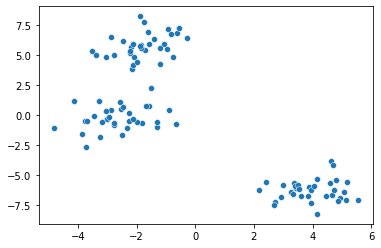

In [3]:
from sklearn.datasets import make_blobs as mb

x = mb(n_samples=100, n_features=2, centers=3)
sns.scatterplot(x=x[0][:, 0], y=x[0][:, 1])

In [12]:
l = k_means(x[0])

[0. 0.]
[0. 0.]
[0. 0.]


In [5]:
def plot_clusters(X, y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=30,
                    marker='o',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    # plt.grid()
    plt.show()

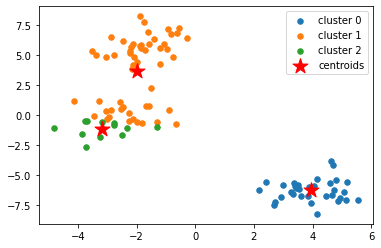

In [10]:
plot_clusters(x[0], l, True)